In [24]:
import pandas as pd

cartolaDataframe = pd.read_csv("/content/jogadores.csv")

cartolaDataframe = cartolaDataframe[(cartolaDataframe["ano"] == 2019)]

cartolaDataframe.rename(columns={"Nome": "Name"}, inplace=True)

In [25]:
print(cartolaDataframe.shape)

print(cartolaDataframe.describe())

print(cartolaDataframe.isna().sum())

(8522, 29)
             Preço            J        Média  ...     ano           RB           PE
count  8522.000000  8522.000000  8522.000000  ...  8522.0  6830.000000  7530.000000
mean      7.706467    12.515959     3.274962  ...  2019.0    15.193997    22.650066
std       3.978725     8.507218     2.018664  ...     0.0    13.767498    19.194452
min       0.690000     0.000000    -6.000000  ...  2019.0     1.000000     1.000000
25%       4.640000     5.000000     2.040000  ...  2019.0     5.000000     8.000000
50%       7.020000    11.000000     3.140000  ...  2019.0    11.000000    17.000000
75%      10.190000    19.000000     4.360000  ...  2019.0    21.000000    33.000000
max      24.420000    38.000000    22.700000  ...  2019.0    94.000000   123.000000

[8 rows x 27 columns]
Name             0
Clube            0
Preço            0
J                0
Média            0
Últ. Pont.       0
Variação         0
DS            8522
G             5045
A             5522
SG            5546
F

In [26]:
cartolaDataframe

,Name,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE
3774,Ricardo Bueno (ATA),Ceará,18.52,1,22.70,22.7,14.52,NaN,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1,2019,1.0,1.0
3775,Bruno Henrique (ATA),Flamengo,21.51,1,21.00,21.0,11.51,NaN,2.0,NaN,NaN,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,2019,NaN,NaN
3776,Nikão (MEI),Athlético-PR,19.29,1,18.80,18.8,10.29,NaN,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1,2019,5.0,NaN
3777,Tiepo (GOL),Chapecoense,13.18,1,17.00,17.0,11.18,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019,NaN,NaN
3778,Vanderlei (GOL),Santos,22.69,1,15.70,15.7,5.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1,2019,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,Lucas Hernández (LAT),Atlético-MG,1.70,5,-0.34,0.8,-0.27,NaN,NaN,NaN,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,10.0,NaN,NaN,38,2019,4.0,14.0
12292,Luccas Claro (ZAG),Fluminense,2.29,2,-0.40,0.4,0.15,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,38,2019,2.0,6.0
12293,Helinho (ATA),São Paulo,2.28,8,-0.42,-1.7,-0.32,NaN,NaN,NaN,NaN,8.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,10.0,1.0,NaN,38,2019,3.0,10.0
12294,Wesley (MEI),Avaí,1.69,10,-0.51,2.9,0.41,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,11.0,1.0,NaN,38,2019,7.0,15.0


In [27]:
#because they are punctual numbers, for example, games without conceding a goal instead of being NaN becomes 0

cartolaDataframe = cartolaDataframe.fillna(0)
cartolaDataframe.isna().sum()

Name          0
Clube         0
Preço         0
J             0
Média         0
Últ. Pont.    0
Variação      0
DS            0
G             0
A             0
SG            0
FS            0
FF            0
FD            0
FT            0
DD            0
DP            0
GC            0
CV            0
CA            0
PP            0
GS            0
FC            0
I             0
PI            0
rodada        0
ano           0
RB            0
PE            0
dtype: int64

In [28]:
# adicionar uma coluna para as posições

playersPosition = []

splitedNames = cartolaDataframe["Name"].str.split(" ")

for splitedName in splitedNames:
  for namePosition in splitedName:
    if "(" in namePosition:
      namePosition = namePosition.replace("(", "")
      namePosition = namePosition.replace(")", "")
      playersPosition.append(namePosition)

cartolaDataframe["posicao"] = playersPosition
cartolaDataframe

,Name,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE,posicao
3774,Ricardo Bueno (ATA),Ceará,18.52,1,22.70,22.7,14.52,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1,2019,1.0,1.0,ATA
3775,Bruno Henrique (ATA),Flamengo,21.51,1,21.00,21.0,11.51,0.0,2.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,0.0,0.0,ATA
3776,Nikão (MEI),Athlético-PR,19.29,1,18.80,18.8,10.29,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,5.0,0.0,MEI
3777,Tiepo (GOL),Chapecoense,13.18,1,17.00,17.0,11.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,0.0,GOL
3778,Vanderlei (GOL),Santos,22.69,1,15.70,15.7,5.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2019,0.0,1.0,GOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,Lucas Hernández (LAT),Atlético-MG,1.70,5,-0.34,0.8,-0.27,0.0,0.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,38,2019,4.0,14.0,LAT
12292,Luccas Claro (ZAG),Fluminense,2.29,2,-0.40,0.4,0.15,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,38,2019,2.0,6.0,ZAG
12293,Helinho (ATA),São Paulo,2.28,8,-0.42,-1.7,-0.32,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,0.0,38,2019,3.0,10.0,ATA
12294,Wesley (MEI),Avaí,1.69,10,-0.51,2.9,0.41,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,1.0,0.0,38,2019,7.0,15.0,MEI


In [29]:
#players with the highest average per position

playerAndPosition = {}

for nome in cartolaDataframe["Name"].unique():
  lastMatchOfPlayer = cartolaDataframe[(cartolaDataframe["Name"]==nome)].tail(1)
  lastMean = lastMatchOfPlayer["Média"].tolist()[0]
  position = lastMatchOfPlayer["posicao"].tolist()[0]

  if position not in playerAndPosition:
    playerAndPosition[position] = {"name": nome, "mean": lastMean}

  if lastMean > playerAndPosition[position]["mean"]:
    data = {"name": nome, "mean": lastMean}
    playerAndPosition[position] = data
  
playerAndPosition

{'ATA': {'mean': 10.73, 'name': 'Rodrygo (ATA)'},
 'GOL': {'mean': 10.0, 'name': 'Alexander (GOL)'},
 'LAT': {'mean': 8.4, 'name': 'Abner Felipe (LAT)'},
 'MEI': {'mean': 10.84, 'name': 'Arrascaeta (MEI)'},
 'TEC': {'mean': 6.4, 'name': 'Andrey Lopes (TEC)'},
 'ZAG': {'mean': 10.0, 'name': 'Rodrigues (ZAG)'}}

In [30]:
cartolaDataframe

,Name,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE,posicao
3774,Ricardo Bueno (ATA),Ceará,18.52,1,22.70,22.7,14.52,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1,2019,1.0,1.0,ATA
3775,Bruno Henrique (ATA),Flamengo,21.51,1,21.00,21.0,11.51,0.0,2.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,0.0,0.0,ATA
3776,Nikão (MEI),Athlético-PR,19.29,1,18.80,18.8,10.29,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,5.0,0.0,MEI
3777,Tiepo (GOL),Chapecoense,13.18,1,17.00,17.0,11.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,0.0,GOL
3778,Vanderlei (GOL),Santos,22.69,1,15.70,15.7,5.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2019,0.0,1.0,GOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,Lucas Hernández (LAT),Atlético-MG,1.70,5,-0.34,0.8,-0.27,0.0,0.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,38,2019,4.0,14.0,LAT
12292,Luccas Claro (ZAG),Fluminense,2.29,2,-0.40,0.4,0.15,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,38,2019,2.0,6.0,ZAG
12293,Helinho (ATA),São Paulo,2.28,8,-0.42,-1.7,-0.32,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,0.0,38,2019,3.0,10.0,ATA
12294,Wesley (MEI),Avaí,1.69,10,-0.51,2.9,0.41,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,1.0,0.0,38,2019,7.0,15.0,MEI


In [31]:
#The team with the highest average 


highestAverageOfTeam = 0
teamNameWithHighestAverage = ""
for clubName in cartolaDataframe["Clube"].unique():
  mean = cartolaDataframe[(cartolaDataframe["Clube"] == clubName)]["Últ. Pont."].mean()
  if mean > highestAverageOfTeam:
    highestAverageOfTeam = mean
    teamNameWithHighestAverage = clubName
    

teamNameWithHighestAverage
print("club: ", teamNameWithHighestAverage, " highest average: ", teamNameWithHighestAverage)

club:  Santos  highest average:  Santos


In [32]:
# add profit for players
cartolaDataframe.head()


cartolaDataframe["Lucro"] = cartolaDataframe["Últ. Pont."]/cartolaDataframe["Preço"]

dicitonaryList = []
#adicionar valor esperado (expected value)
for nome in cartolaDataframe["Name"].unique():
  totalGames = cartolaDataframe[(cartolaDataframe["Name"] == nome)].shape[0]
  if totalGames > 20:
    totaThatPlayerCanGain = cartolaDataframe[(cartolaDataframe["Lucro"] >= 0) & (cartolaDataframe["Name"] == nome)]["Lucro"].mean()
    totaThatPlayerCanLost = cartolaDataframe[(cartolaDataframe["Lucro"] <= 0) & (cartolaDataframe["Name"] == nome)]["Lucro"].mean()

    probabilityOfWin = len(cartolaDataframe[(cartolaDataframe["Lucro"] >= 0) & (cartolaDataframe["Name"] == nome)])/totalGames
    probabilityOfLose = len(cartolaDataframe[(cartolaDataframe["Lucro"] <= 0) & (cartolaDataframe["Name"] == nome)])/totalGames
    probabilityOfDraw = len(cartolaDataframe[(cartolaDataframe["Lucro"] == 0) & (cartolaDataframe["Name"] == nome)])/totalGames

    if probabilityOfDraw > 0:
      probabilityOfWin = probabilityOfWin - probabilityOfDraw
      probabilityOfLose = probabilityOfLose + probabilityOfDraw

    if pd.isnull(totaThatPlayerCanGain) or totaThatPlayerCanGain == 0:
      totaThatPlayerCanGain = 0
      probabilityOfWin = 0

    if pd.isnull(totaThatPlayerCanLost) or totaThatPlayerCanLost == 0:
      totaThatPlayerCanLost = 0

    ev = (totaThatPlayerCanGain * probabilityOfWin) - (totaThatPlayerCanLost * probabilityOfLose)
    position = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["posicao"].to_list()[0]
    club = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["Clube"].to_list()[0]
    price = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["Preço"].mean()
    score = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["Últ. Pont."].mean()
    data = {"Name": nome, "EV": ev, "Position": position, "Club": club, "Price": price, "Score": score, "ProbabilityOfWin": probabilityOfWin}
    dicitonaryList.append(data)


In [33]:
def generateTeam4_4_2(df, nomeDaColunaParaOrdernar):
  attacker = df[(df["Position"] == "ATA")].sort_values(by=nomeDaColunaParaOrdernar).tail(2)
  defenser = df[(df["Position"] == "ZAG")].sort_values(by=nomeDaColunaParaOrdernar).tail(2)
  lateral = df[(df["Position"] == "LAT")].sort_values(by=nomeDaColunaParaOrdernar).tail(2)
  mid = df[(df["Position"] == "MEI")].sort_values(by=nomeDaColunaParaOrdernar).tail(4)
  manager = df[(df["Position"] == "TEC")].sort_values(by=nomeDaColunaParaOrdernar).tail(1)
  goalkeeper = df[(df["Position"] == "GOL")].sort_values(by=nomeDaColunaParaOrdernar).tail(1)

  return attacker, defenser, lateral, mid, manager, goalkeeper

In [34]:
df = pd.DataFrame(dicitonaryList,
                  columns=['Name', 'EV', 'Position', "Club", "Price", "Score", "ProbabilityOfWin"])


print(df.shape)

#tatic: 4-4-2
#the best team with EV
attacker, defenser, lateral, mid, manager, goalkeeper = generateTeam4_4_2(df, "EV")

print("MELHORES ATACANTES: ", attacker)
print("MELHORES ZAGUEIROS: ", defenser)
print("MELHORES LATERAIS: ", lateral)
print("MELHORES MEIAS: ", mid)
print("MELHOR GOLEIRO: ", manager)
print("MELHOR TECNICO: ", goalkeeper)

(170, 7)
MELHORES ATACANTES:                      Name        EV  ...     Score ProbabilityOfWin
122      Romarinho (ATA)  0.625967  ...  3.469231         0.961538
137  Caio Paulista (ATA)  0.668194  ...  2.691304         0.913043

[2 rows x 7 columns]
MELHORES ZAGUEIROS:                   Name        EV Position  ...     Price     Score  ProbabilityOfWin
164  Alan Costa (ZAG)  0.682429      ZAG  ...  4.404583  2.358333          0.541667
104        Nino (ZAG)  0.796677      ZAG  ...  3.812571  3.374286          0.771429

[2 rows x 7 columns]
MELHORES LATERAIS:               Name        EV Position  ...     Price     Score  ProbabilityOfWin
95    Apodi (LAT)  0.591115      LAT  ...  5.123333  2.686667          0.633333
140  Patric (LAT)  0.744716      LAT  ...  4.096818  2.231818          0.590909

[2 rows x 7 columns]
MELHORES MEIAS:                       Name        EV  ...     Score ProbabilityOfWin
167  Richard Franco (MEI)  0.610653  ...  2.965385         0.807692
154          Fláv

In [35]:
#get dataframe with the players with the highest expected value
import numpy as np

playersWithHighestEV = pd.concat([attacker, defenser, lateral, mid, manager, goalkeeper])

rowsWithPlayers = np.isin(cartolaDataframe, playersWithHighestEV["Name"].to_list())

cartolaDataframePlayersWithHighestEV = cartolaDataframe[rowsWithPlayers]


In [36]:
cartolaDataframePlayersWithHighestEV

,Name,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE,posicao,Lucro
3904,Allan (MEI),Fluminense,3.54,1,1.10,1.10,-0.46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1,2019,2.0,4.0,MEI,0.310734
3953,Apodi (LAT),CSA,4.72,1,-0.20,-0.20,-2.28,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,4.0,LAT,-0.042373
3958,Fernando Diniz (TEC),Fluminense,4.65,1,-0.30,-0.30,-2.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,0.0,TEC,-0.064516
3960,Wellington (MEI),Athlético-PR,3.05,1,-0.60,-0.60,-1.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,2.0,MEI,-0.196721
3968,Nino (ZAG),Fluminense,1.39,1,-1.00,-1.00,-1.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,2019,1.0,0.0,ZAG,-0.719424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12006,Alan Costa (ZAG),CSA,4.63,25,2.25,0.00,0.00,0.0,1.0,0.0,6.0,5.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,24.0,3.0,0.0,37,2019,29.0,34.0,ZAG,0.000000
12141,Nino (ZAG),Fluminense,5.56,35,3.55,4.20,-1.21,0.0,1.0,1.0,10.0,27.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,28.0,0.0,0.0,38,2019,51.0,32.0,ZAG,0.755396
12154,Fernando Diniz (TEC),São Paulo,7.46,32,3.40,2.77,-0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,2019,0.0,0.0,TEC,0.371314
12159,Romarinho (ATA),Fortaleza,5.96,32,3.31,1.70,0.11,0.0,3.0,4.0,0.0,74.0,9.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.0,3.0,0.0,38,2019,20.0,52.0,ATA,0.285235


In [37]:
def getColumnDataBasedOnThePlayerName(playerName, dfToGetData, columnToGetData):
  columnData = dfToGetData[(dfToGetData["Name"] == playerName)][columnToGetData]
  columnData = columnData.replace(0, columnData.mean()).to_list()
  return columnData

In [38]:
def generateDataFromColumnPerRound(columnToGetRoundData, dataframe):
  data = {}
  for player in dataframe["Name"].unique():
    data[player] = getColumnDataBasedOnThePlayerName(player, dataframe, columnToGetRoundData)

  # preencher os NaN com a media
  dfPerRound = pd.DataFrame.from_dict(data,  orient='index').T

  fillMean = lambda col: col.fillna(col.mean())

  return dfPerRound.apply(fillMean, axis=0)

In [39]:
scorePerRoundOfTimeEV = generateDataFromColumnPerRound("Últ. Pont.", cartolaDataframePlayersWithHighestEV).sum(axis=1)
print(scorePerRoundOfTimeEV.mean())

31.115886491907343


In [40]:
dataList = []
#filter the players with 20 matches or more
for name in cartolaDataframe["Name"].unique():
  totalGames = cartolaDataframe[(cartolaDataframe["Name"] == name)].shape[0]
  if totalGames > 20:
    mean = cartolaDataframe[(cartolaDataframe["Name"] == name)]["Últ. Pont."].mean()
    position = cartolaDataframe[(cartolaDataframe["Name"] == name)]["posicao"].to_list()[0]
    data = {"Name": name, "Mean": mean, "Position": position}
    dataList.append(data)



In [41]:
# Generate the team with the players with the highest average
dataFrameHighestAverage = pd.DataFrame(dataList,
                  columns=['Name', 'Mean', 'Position'])

attackerHighestAverage, defenserHighestAverage, lateralHighestAverage, midHighestAverage, managerHighestAverage, goalkeeperHighestAverage = generateTeam4_4_2(dataFrameHighestAverage, "Mean")

playersWithHighestAverage = pd.concat([attackerHighestAverage, defenserHighestAverage, lateralHighestAverage, midHighestAverage, managerHighestAverage, goalkeeperHighestAverage])

rowsWithPlayers = np.isin(cartolaDataframe, playersWithHighestAverage["Name"].to_list())

cartolaDataframeplayersWithHighestAverage  = cartolaDataframe[rowsWithPlayers]

pontuacaoPorRodadaParaCadaJogadorComMediaAlta = {}

scorePerRoundTeamHighestAverage = generateDataFromColumnPerRound("Últ. Pont.", cartolaDataframeplayersWithHighestAverage).sum(axis=1)

print(scorePerRoundTeamHighestAverage.mean())

82.10831839758166


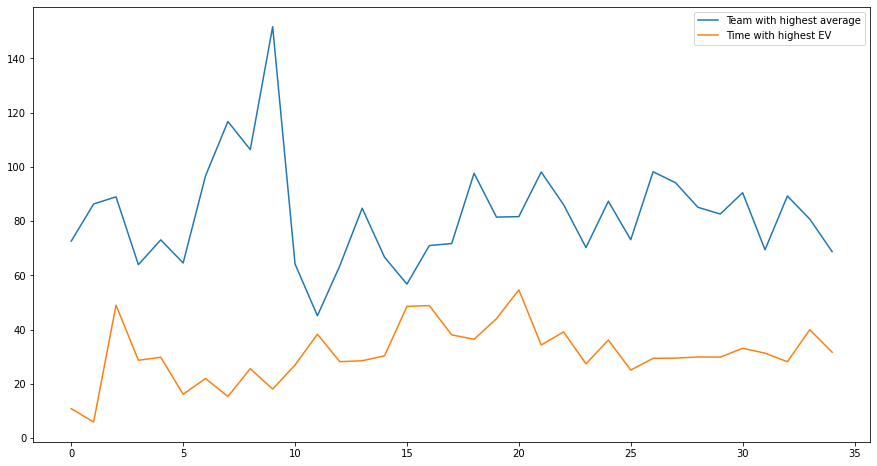

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#We removed 1 because the EV team played 1 round less
x = list(range(0, len(scorePerRoundTeamHighestAverage) - 1))

xev = list(range(0, len(scorePerRoundOfTimeEV)))
plt.plot(x, scorePerRoundTeamHighestAverage.head(35), label="Team with highest average")
plt.plot(xev, scorePerRoundOfTimeEV, label="Time with highest EV")

plt.legend()

In [43]:
# generate price per round TEAM HIGHEST AVERAGE
pricePerRoundTeamHighestAverage = generateDataFromColumnPerRound("Preço", cartolaDataframeplayersWithHighestAverage).sum(axis=1)

pricePerRoundTeamHighestAverage

0     140.550000
1     146.050000
2     151.940000
3     150.250000
4     151.690000
5     156.680000
6     162.330000
7     171.390000
8     171.200000
9     186.380000
10    176.900000
11    171.120000
12    174.050000
13    179.850000
14    177.170000
15    172.600000
16    176.430000
17    178.870000
18    181.110000
19    180.330000
20    180.290000
21    182.518571
22    180.477662
23    177.768967
24    180.538967
25    178.618967
26    181.527044
27    180.637044
28    179.299186
29    176.353324
30    176.967324
31    171.726679
32    174.966679
33    173.906679
34    171.546679
35    172.846679
dtype: float64

In [44]:
# generate price per round TEAM EV
pricePerRoundTeamEV = generateDataFromColumnPerRound("Preço", cartolaDataframePlayersWithHighestEV).sum(axis=1)

pricePerRoundTeamEV

0     35.020000
1     29.700000
2     41.450000
3     40.790000
4     43.080000
5     42.550000
6     42.770000
7     41.310000
8     44.950000
9     42.750000
10    45.240000
11    47.780000
12    46.010000
13    47.990000
14    48.850000
15    52.590000
16    52.620000
17    52.210000
18    52.490000
19    52.460000
20    56.440000
21    53.226667
22    52.983485
23    52.259572
24    53.344155
25    50.651355
26    49.852509
27    50.152509
28    50.506080
29    50.656080
30    50.189414
31    50.009414
32    48.796601
33    50.726601
34    49.516601
dtype: float64

In [45]:
print("AVERAGE PRICE TEAM EV: ", np.mean(pricePerRoundTeamEV), " MAX PRICE: ", np.max(pricePerRoundTeamEV), " MIN PRICE: ", np.min(pricePerRoundTeamEV), " MEDIAN: ", np.median(pricePerRoundTeamEV))
print("AVERAGE PRICE TEAM HIGHEST AVERAGE: ", np.mean(pricePerRoundTeamHighestAverage), " MAX PRICE: ", np.max(pricePerRoundTeamHighestAverage), " MIN PRICE: ", np.min(pricePerRoundTeamHighestAverage), " MEDIAN: ", np.median(pricePerRoundTeamHighestAverage))

AVERAGE PRICE TEAM EV:  47.76917267496996  MAX PRICE:  56.440000000000005  MIN PRICE:  29.7  MEDIAN:  49.85250898449377
AVERAGE PRICE TEAM HIGHEST AVERAGE:  172.13556812434123  MAX PRICE:  186.38  MIN PRICE:  140.55  MEDIAN:  176.39166219837134


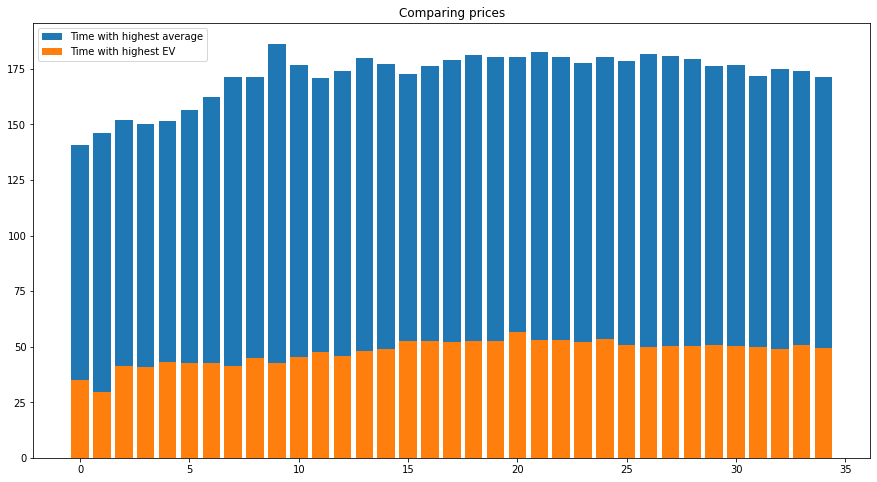

In [62]:

x = list(range(0, len(pricePerRoundTeamHighestAverage)-1))

xEv = list(range(0, len(pricePerRoundTeamEV)))
plt.figure(figsize=(15,8))
plt.title("Comparing prices")
plt.bar(x, pricePerRoundTeamHighestAverage.head(35), label="Time with highest average")
plt.bar(xEv, pricePerRoundTeamEV, label="Time with highest EV")

plt.legend()

In [68]:
#Obtain averages during the entire Brazilian championship
dados = []
for name in df["Name"].unique():
  price = np.mean(getColumnDataBasedOnThePlayerName(name, df, "Price"))
  score = np.mean(getColumnDataBasedOnThePlayerName(name, df, "Score"))
  ev = np.mean(getColumnDataBasedOnThePlayerName(name, df, "EV"))
  probabilityOfWin = np.mean(getColumnDataBasedOnThePlayerName(name, df, "ProbabilityOfWin"))
  position = df[(df["Name"] == name)]["Position"].to_list()[0]

  data = {"Score": score, "Price": price, "Name": name, "EV": ev, "Position": position, "ProbabilityOfWin": probabilityOfWin}
  dados.append(data)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Probability of Win vs EV')

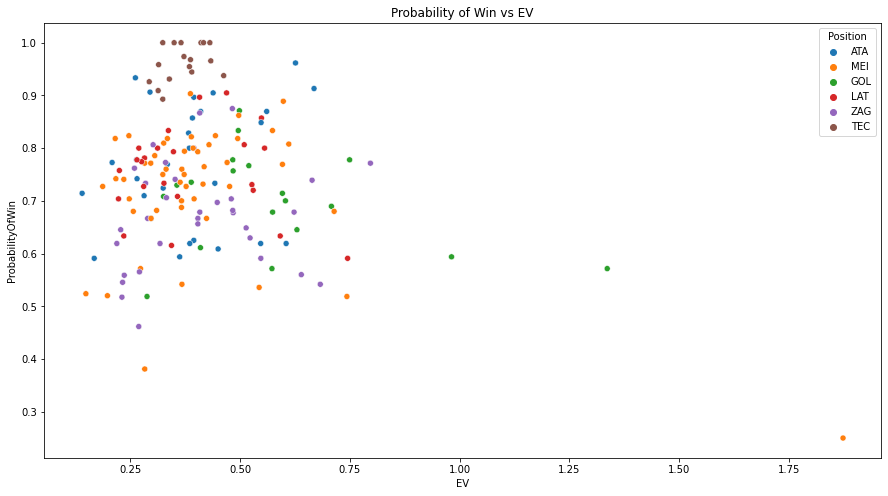

In [69]:
#create grouping
import seaborn as sns


dataFrameTheBestTeam = pd.DataFrame(dados, columns=["Score", "Price", "Name", "EV", "Position", "ProbabilityOfWin"])

dataFrameTheBestTeam["ScorePerPrice"] = dataFrameTheBestTeam["Score"]/dataFrameTheBestTeam["Price"]

plt.figure(figsize=(15,8))
sns.scatterplot('EV', 'ProbabilityOfWin', data=dataFrameTheBestTeam, hue="Position").set_title("Probability of Win vs EV")




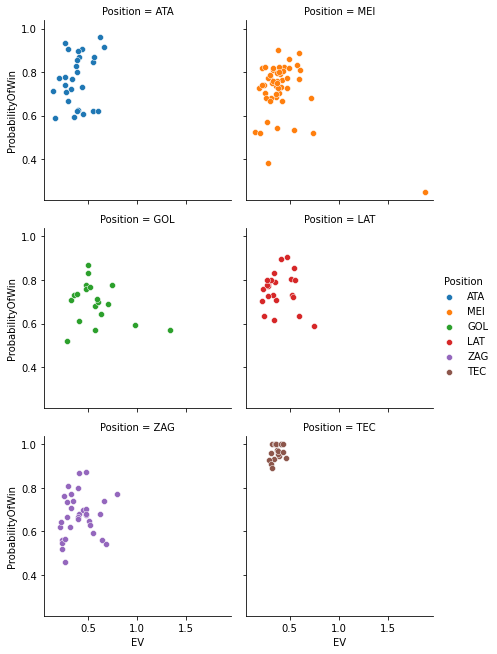

In [70]:
g = sns.FacetGrid(dataFrameTheBestTeam, col="Position", hue="Position", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="EV", y="ProbabilityOfWin")
g.set_axis_labels("EV", "ProbabilityOfWin")

g.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score player vs EV')

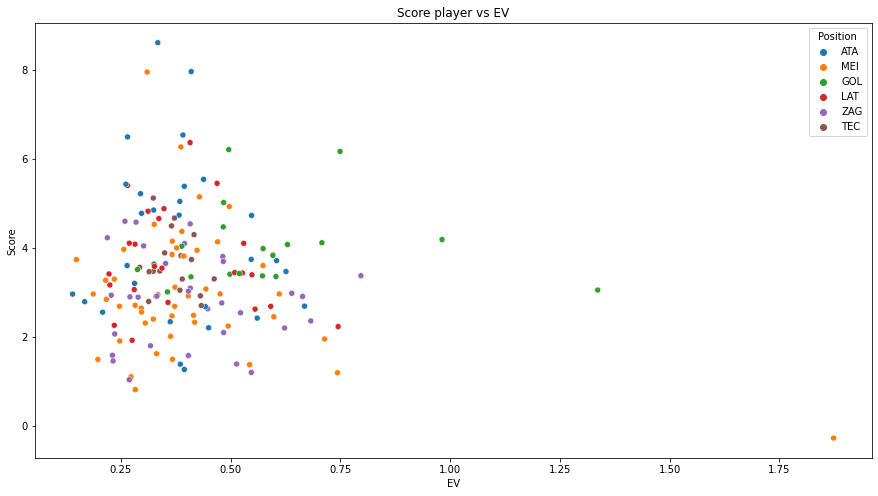

In [71]:
plt.figure(figsize=(15,8))
sns.scatterplot('EV', 'Score', data=dataFrameTheBestTeam, hue="Position").set_title("Score player vs EV")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score player vs EV')

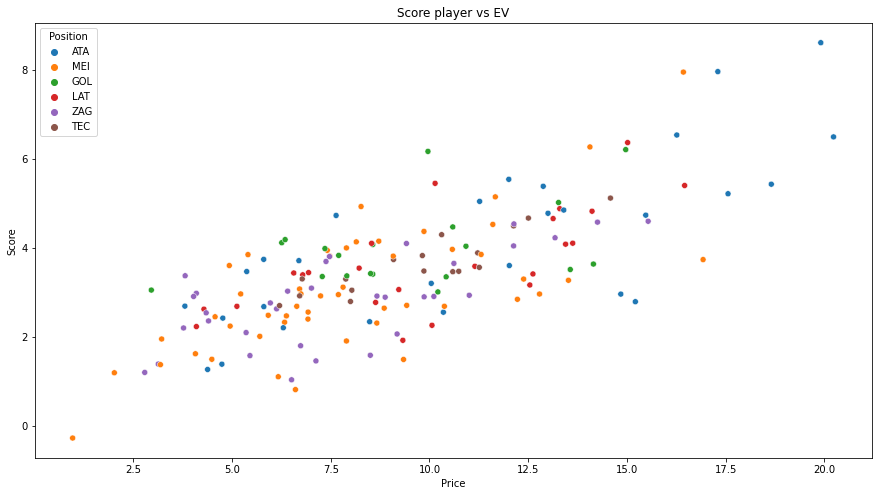

In [72]:
plt.figure(figsize=(15,8))
sns.scatterplot('Price', 'Score', data=dataFrameTheBestTeam, hue="Position").set_title("Score player vs EV")

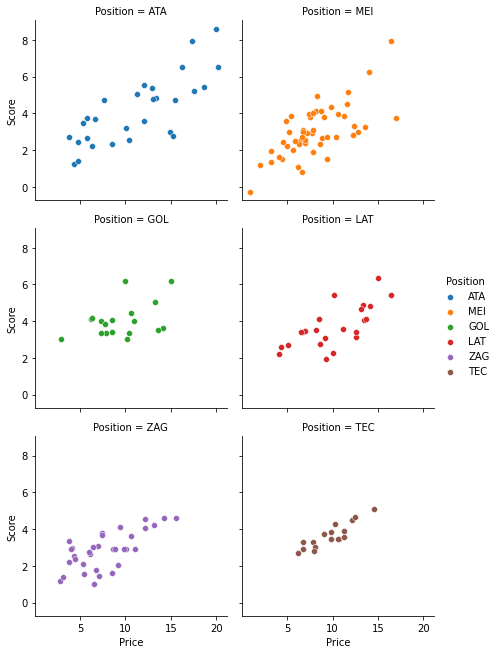

In [73]:
g = sns.FacetGrid(dataFrameTheBestTeam, col="Position", hue="Position", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="Price", y="Score")
g.set_axis_labels("Price", "Score")
g.add_legend()

In [74]:
dataFrameTheBestTeam[(dataFrameTheBestTeam["Price"] > 13) & (dataFrameTheBestTeam["Price"] < 16)].groupby(by="Position").max()

,Score,Price,Name,EV,ProbabilityOfWin,ScorePerPrice
Position,,,,,,
ATA,4.851724,15.475714,Rony (ATA),0.382414,0.828571,0.367605
GOL,6.211111,14.968889,Weverton (GOL),0.495535,0.833333,0.414935
LAT,6.368966,15.017241,Reinaldo (LAT),0.407375,0.896552,0.424110
MEI,6.270968,14.062581,Willian Arão (MEI),0.386482,0.903226,0.445933
TEC,5.121071,14.582143,Jorge Jesus (TEC),0.323545,0.892857,0.351188
ZAG,4.600000,15.536667,Víctor Cuesta (ZAG),0.284309,0.761905,0.321313


In [59]:
dataFrameTheBestTeam

dataList = []
for combination in range(0, 1000000):
  playersName = []

  attacker = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="ATA")].sample(n=2)
  attacker0 = attacker.iloc[0]
  attacker1 = attacker.iloc[1]

  manager = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="TEC")].sample(n=1).iloc[0]

  goalkeeper = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="GOL")].sample(n=1).iloc[0]

  mid = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="MEI")].sample(n=4)
  mid0 = mid.iloc[0]
  mid1 = mid.iloc[1]
  mid2 = mid.iloc[2]
  mid3 = mid.iloc[3]

  defenser = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="ZAG")].sample(n=2)
  defenser0 = defenser.iloc[0]
  defenser1 = defenser.iloc[1]

  lateral = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="LAT")].sample(n=2)
  lateral0 = lateral.iloc[0]
  lateral1 = lateral.iloc[1]

 
  teamPrice = attacker["Price"].sum() + manager["Price"].sum() + goalkeeper["Price"].sum() + mid["Price"].sum() + defenser["Price"].sum() + lateral["Price"].sum()

  if teamPrice >= 95 and teamPrice <= 100:
    playersName.extend([attacker0["Name"], attacker1["Name"], manager["Name"], goalkeeper["Name"], mid0["Name"], mid1["Name"], mid2["Name"], mid3["Name"], defenser0["Name"], defenser1["Name"], lateral0["Name"], lateral1["Name"]])
    teamScore = attacker["Score"].sum() + manager["Score"].sum() + goalkeeper["Score"].sum() + mid["Score"].sum() + defenser["Score"].sum() + lateral["Score"].sum()
    print("COMBINATION: ", combination, " TEAM SCORE: ",  teamScore, " PRICE: ", teamPrice)
    data = {"TeamPrice": teamPrice, "TeamScore": teamScore, "Players": playersName}
    dataList.append(data)
  

dataList

COMBINATION:  0  TEAM SCORE:  41.45510419969551  PRICE:  99.06011647602345
COMBINATION:  3  TEAM SCORE:  37.861379311751605  PRICE:  98.27247719278489
COMBINATION:  6  TEAM SCORE:  37.09557014073143  PRICE:  97.56384130039612
COMBINATION:  20  TEAM SCORE:  38.80140978150838  PRICE:  99.50978626950605
COMBINATION:  45  TEAM SCORE:  37.881350442510694  PRICE:  99.43951520673752
COMBINATION:  46  TEAM SCORE:  32.77148325145741  PRICE:  96.17239864264043
COMBINATION:  54  TEAM SCORE:  32.43578827892133  PRICE:  97.72957918942843
COMBINATION:  74  TEAM SCORE:  37.14594190836889  PRICE:  95.46580634210926
COMBINATION:  116  TEAM SCORE:  38.228862950032784  PRICE:  98.38675567625575
COMBINATION:  117  TEAM SCORE:  40.92452363104162  PRICE:  99.14205701432502
COMBINATION:  120  TEAM SCORE:  37.86387441240383  PRICE:  99.98144484606249
COMBINATION:  144  TEAM SCORE:  37.84144936762584  PRICE:  99.5136714200832
COMBINATION:  159  TEAM SCORE:  33.78927685699381  PRICE:  96.25051377274974
COMBINAT

KeyboardInterrupt: ignored

In [ ]:
dataFrameTheBestTeam.shape

In [ ]:
dataFrame100Cartoletas = pd.DataFrame(dataList, columns=["TeamPrice", "TeamScore", "Players"])

print("SHAPE: ", dataFrame100Cartoletas.shape)

print("MAX SCORE: ", dataFrame100Cartoletas["TeamScore"].max(), " AVERAGE SCORE: ", dataFrame100Cartoletas["TeamScore"].mean())
print("PLAYERS: ", dataFrame100Cartoletas.max()["Players"], " STANDARD DEVIATION: ", dataFrame100Cartoletas["TeamScore"].std())

